<a href="https://colab.research.google.com/github/kevindmzapata/deep-learning-project/blob/main/01_exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Exploración de los Datos

## I. Librerias necesarias

In [1]:
!wget -nc --no-cache -O database.zip -q https://raw.githubusercontent.com/kevindmzapata/deep-learning-project/main/database.zip
!unzip -n -q database.zip
!rm database.zip
!wget -nc --no-cache -O utils.py -q https://raw.githubusercontent.com/kevindmzapata/deep-learning-project/main/resources/utils.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import load_data

## II. Cargar las imagenes de la base de datos

In [3]:
images, labels, ch_spacing = load_data('database')

In [4]:
images.shape, labels.shape, ch_spacing.shape

((729, 32, 32), (729,), (729,))

In [5]:
print('Minimo de images:', images.min())
print('Maximo de images:', images.max())

Minimo de images: 0
Maximo de images: 255


In [6]:
print('Minimo de labels:', labels.min())
print('Maximo de labels:', labels.max())

Minimo de labels: 18.0
Maximo de labels: 40.0


In [7]:
print('Minimo del espaciamiento: ', ch_spacing.min())
print('Maximo del espaciamiento: ', ch_spacing.max())

Minimo del espaciamiento:  0
Maximo del espaciamiento:  7


Las imagenes se cargan usando una función dentro de la libreria utils.py. Adicionalmente, se cargan las etiquetas de cada una de las imagenes junto con el valor de espaciamiento de canal que funciona como caractristica extra dentro de la red.

## III. Mostrar imágenes

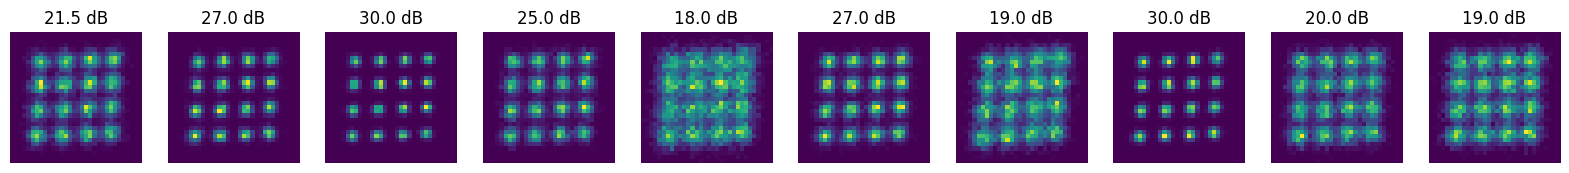

In [8]:
X_sample_idx = np.random.randint(0, images.shape[0], 10)
X_sample = images[X_sample_idx]
y_sample = labels[X_sample_idx]

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.set_title(f"{y_sample[i]} dB")
    ax.imshow(X_sample[i])
    ax.axis("off")
plt.show()

## VI. Normalización de los datos

In [9]:
X = images.reshape(images.shape[0], images.shape[1] * images.shape[2]) / images.max()
y = labels.reshape(labels.shape[0], 1)

X.shape, y.shape

((729, 1024), (729, 1))

In [10]:
ch = np.eye(len(np.unique(ch_spacing)))[ch_spacing]
ch.shape

(729, 8)

In [11]:
X.min(), X.max(), y.min(), y.max(), ch.min(), ch.max()

(0.0, 1.0, 18.0, 40.0, 0.0, 1.0)

In [12]:
# Codificación One Hot
print(ch[:5])

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


Las imágenes se normalizan entre 0 y 1 dividiendo por el maximo, que es 255. Las etiquetas se dejan con su valor original pero podrían normalizarse entre 0 y 1 posteriormente. Por otro lado, los valor del espaciamiento de canal son valores entre 0 y 7, que corresponden a los 8 espaciamientos que hay dentro de la base de datos. Estos espaciamientos se codifican usando One Hot Encoding.